<a id="setup"></a>
# <b><p style="background-image: url(https://i.postimg.cc/MpTLFhtf/wp9806504-network-desktop-wallpapers.jpg);background-size: cover;font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 1 | Python Libraries</p></b>



<a id="import"></a>
## <b><span style="color:navy">✈️ Step 1.1 | </span><span style="color:red">Import Libraries</span></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

print(colored('\nAll libraries imported succesfully', 'green'))


All libraries imported succesfully


<a id="config"></a>
## <b><span style="color:navy">✈️ Step 1.2 | </span><span style="color:red">Library configurations</span></b>

In [2]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

In [3]:
print(colored('\nAll libraries Configed succesfully.', 'green'))


All libraries Configed succesfully.


<a id="data"></a>
# <b><p style="background-image: url(https://i.postimg.cc/MpTLFhtf/wp9806504-network-desktop-wallpapers.jpg);background-size: cover;font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 2 | Data</p></b>



<a id="load_data"></a>
## <b><span style="color:navy">✈️ Step 2.1 | </span><span style="color:red">Importing Data</span></b>

In [4]:
data = pd.read_csv('Clean_Dataset.csv')
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<a id="info"></a>
## <b><span style="color:navy">✈️ Step 2.2 | </span><span style="color:red">Data Informations</span></b>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
data.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<div style="font-size:110%; font-weight:500; background-color:black">➡️ There is no null value.</div>

<div style="font-size:110%; font-weight:500; background-color:black">➡️ Drop <code>unnamed: 0</code> column.</div>

In [7]:
data.drop(columns='Unnamed: 0', inplace=True)

<div style="font-size:110%; font-weight:500; background-color:black">➡️ Rename class name to flight_class, Because class is python reserved name.</div>

In [8]:
data.rename(columns={'class': 'flight_class'}, inplace=True)

<a id="features"></a>
## <b><span style="color:navy">✈️ Step 2.3 | </span><span style="color:red">Features</span></b>

<div style="border:3px solid navy; border-radius:30px; padding: 15px; background-size: cover">
<p><h2 style="color:navy; font-size:250%"><b>FEATURES</b></h2></p>


<p><h5 style="font-size:130%; font-family:Arial ">The various features of the cleaned dataset are explained below:
    
<h4><b>1) Airline: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.</h5></p>
<h4><b>2) Flight: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">Flight stores information regarding the plane's flight code. It is a categorical feature.</h5></p>
<h4><b>3) Source City: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">City from which the flight takes off. It is a categorical feature having 6 unique cities.</h5></p>
<h4><b>4) Departure Time: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.</h5></p>
<h4><b>5) Stops: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.</h5></p>
<h4><b>6) Arrival Time: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.</h5></p>
<h4><b>7) Destination City: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">City where the flight will land. It is a categorical feature having 6 unique cities.</h5></p>
<h4><b>8) Class: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.</h5></p>
<h4><b>9) Duration: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">A continuous feature that displays the overall amount of time it takes to travel between cities in hours.</h5></p>
<h4><b>10)Days Left: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">This is a derived characteristic that is calculated by subtracting the trip date by the booking date.</h5></p>
<h4><b>11) Price: </b></h4>
<p><h5 style="font-size:110%; font-family:Arial ">Target variable stores information of the ticket price.</h5></p>

<a id="visualizations"></a>
# <b><p style="background-image: url(https://i.postimg.cc/MpTLFhtf/wp9806504-network-desktop-wallpapers.jpg);background-size: cover;font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 3 | visualizations</p></b>



<a id="plots"></a>
## <b><span style="color:navy">✈️ Step 3.1 | </span><span style="color:red">Plots</span></b>

In [9]:
# Print all columns and their indexes.
for index, value in enumerate(data.columns) :
    print(index, ":", value)

0 : airline
1 : flight
2 : source_city
3 : departure_time
4 : stops
5 : arrival_time
6 : destination_city
7 : flight_class
8 : duration
9 : days_left
10 : price


### <code>airline</code>

In [10]:
data.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

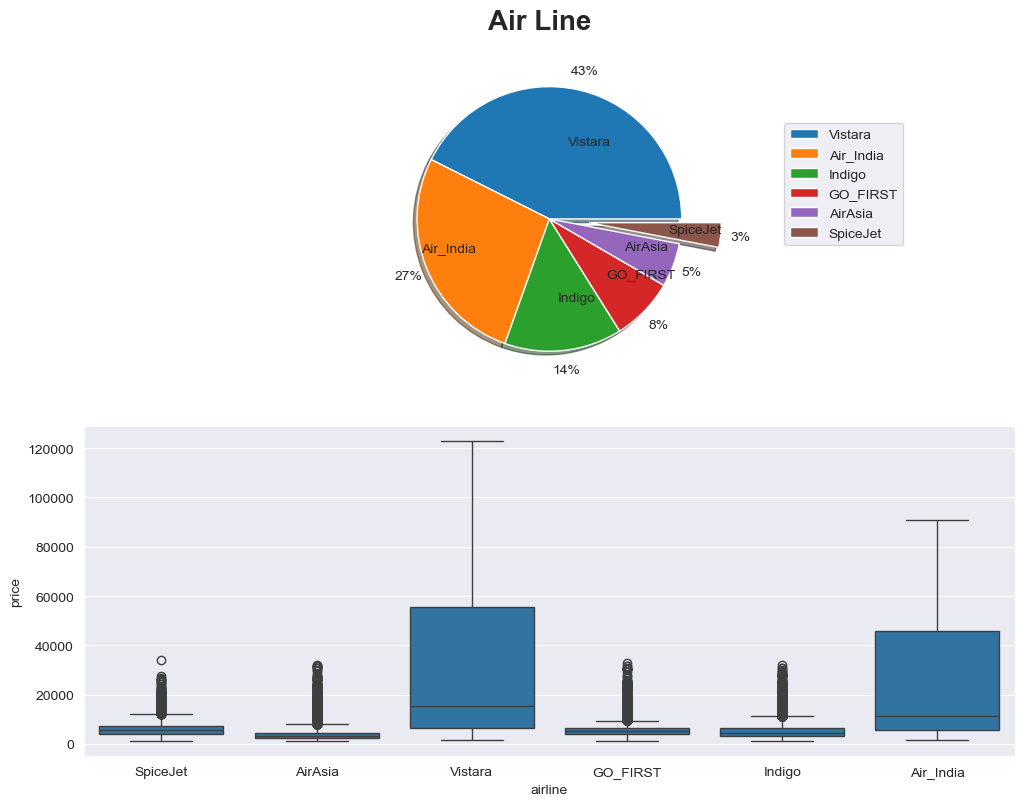

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Air Line', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.airline.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.airline.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.15, labeldistance=0.6, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='airline', y='price', data=data, ax=ax[1])

plt.show()

 - Most used airline is <code>Vistara</code> (43% of all flights, 127859 flights)
 - Second place is <code>Air_India</code> (27% of all flights, 80892 flights)
 - Less used airline is <code>SpiceJet</code> (3% of all flights, 9011 flights)

### <code>flight</code>

In [12]:
len(data.flight.value_counts())

1561

<div style="font-size:110%; font-weight:500; background-color:black">➡️ Becase of large values of unique values,  i can not plot this column.</div>

<div style="font-size:110%; font-weight:500; background-color:black">➡️ Flight name is like a ID, so its not nessasary for modeling and will drop from dataframe.</div>

In [13]:
data.drop(columns='flight', inplace=True)

### <code>source_city</code>

In [14]:
data.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

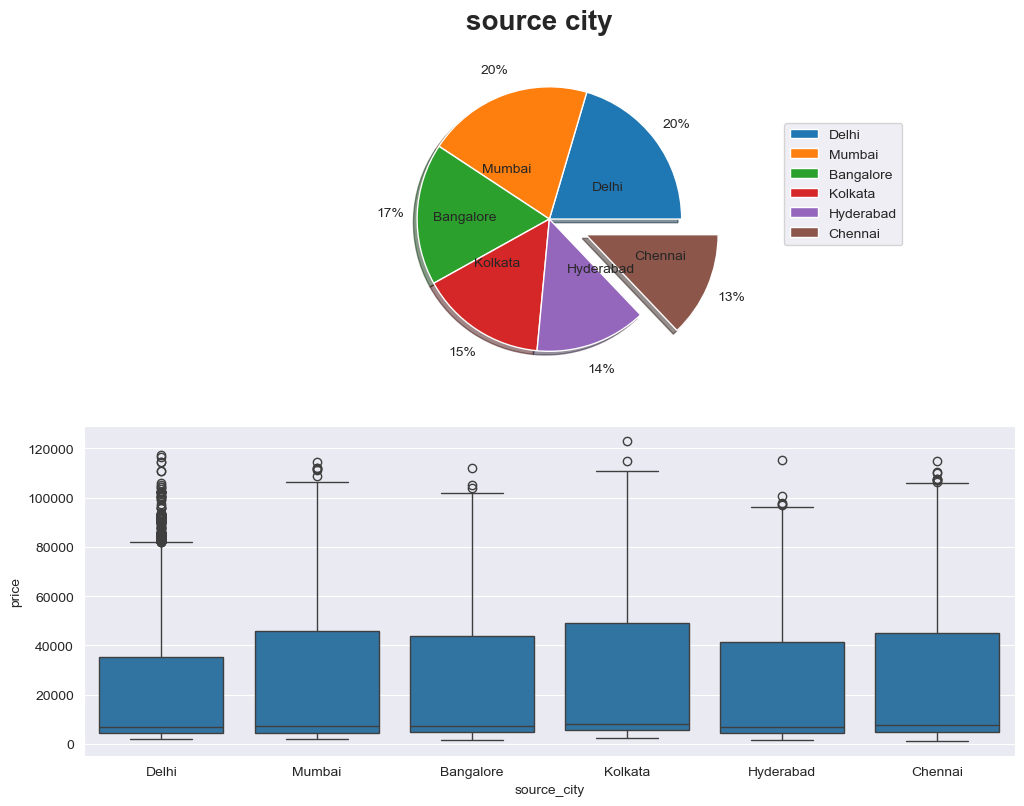

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('source city', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.source_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.source_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='source_city', y='price', data=data, ax=ax[1])
plt.show()

Almost number of all flights source is equal.

### <code>departure_time</code>

In [16]:
data.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

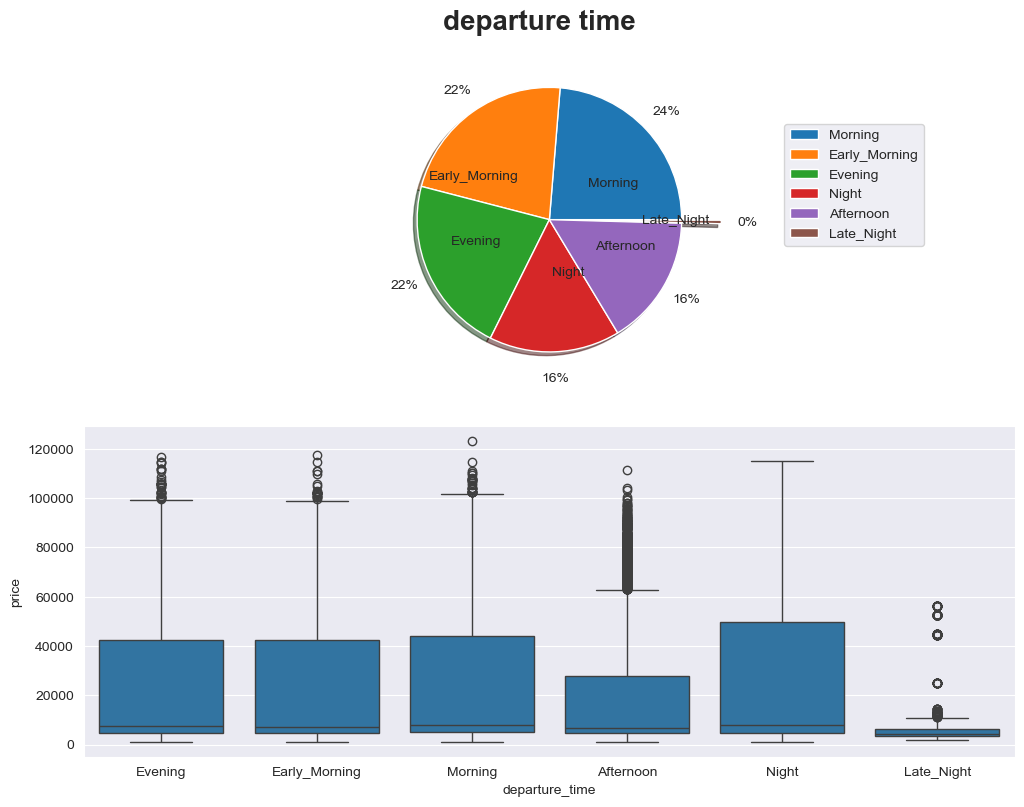

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('departure time', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.departure_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.departure_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='departure_time', y='price', data=data, ax=ax[1])
plt.show()

Except at the end of <code>Late_Night</code>, the frequency of the rest of the departure_time is almost equal.

### <code>stops</code>

In [18]:
data.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

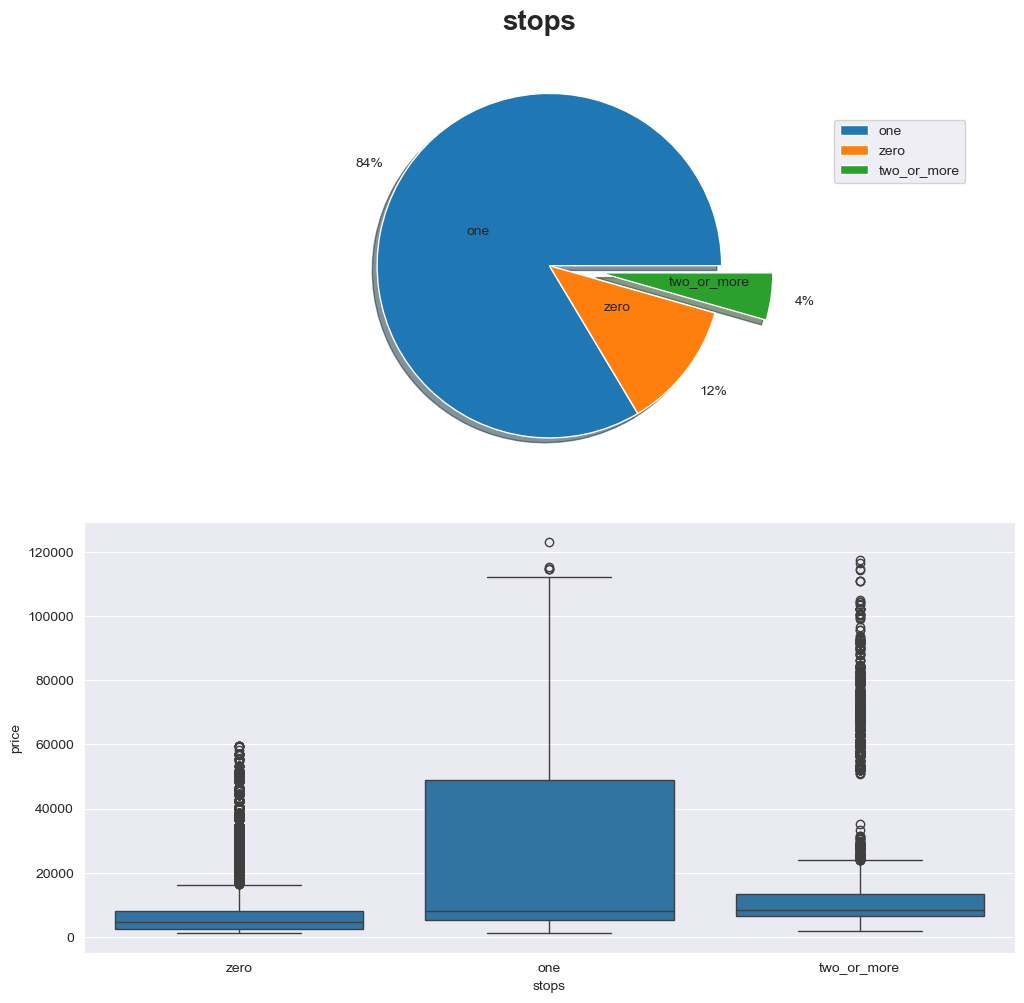

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('stops', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.stops.value_counts().index.tolist()
explode = (0, 0, 0.3)
ax[0].pie(data.stops.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='stops', y='price', data=data, ax=ax[1])
plt.show()

 - Most of the flights have 1 stop (about 84% , 250863 flights).
 - Just 4% of flights have 2 or more than 2 stops during their flights.
 - About 12% of flights have not any stop.(13286 flights)

### <code>arrival_time</code>

In [20]:
data.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

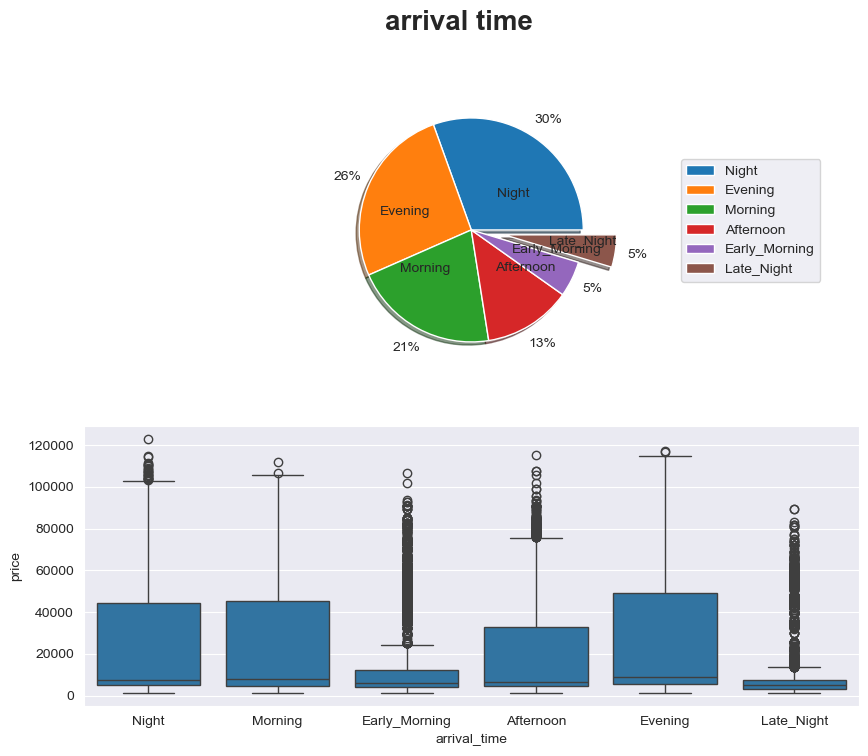

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('arrival time', fontsize=20, fontweight='bold')
# Top ax
labels = data.arrival_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.arrival_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='arrival_time', y='price', data=data, ax=ax[1])
plt.show()

### <code>destination_city</code>

In [22]:
data.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

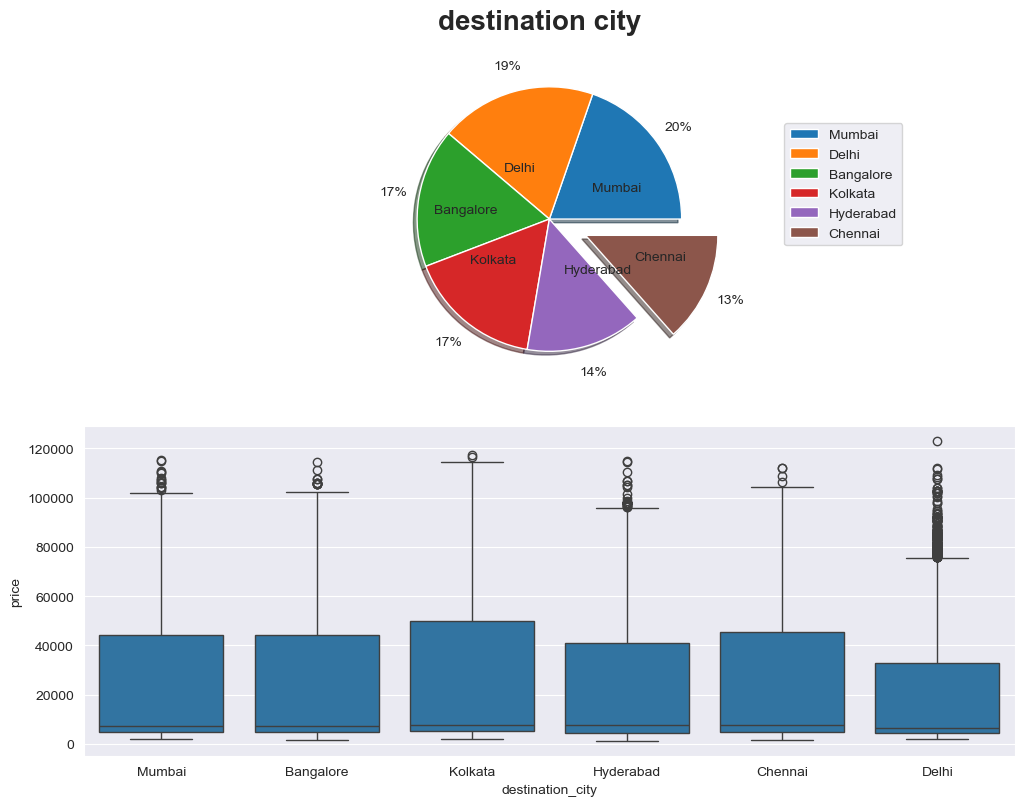

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('destination city', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.destination_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.destination_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='destination_city', y='price', data=data, ax=ax[1])
plt.show()

### <code>flight_class</code>

In [24]:
data.flight_class.value_counts()

flight_class
Economy     206666
Business     93487
Name: count, dtype: int64

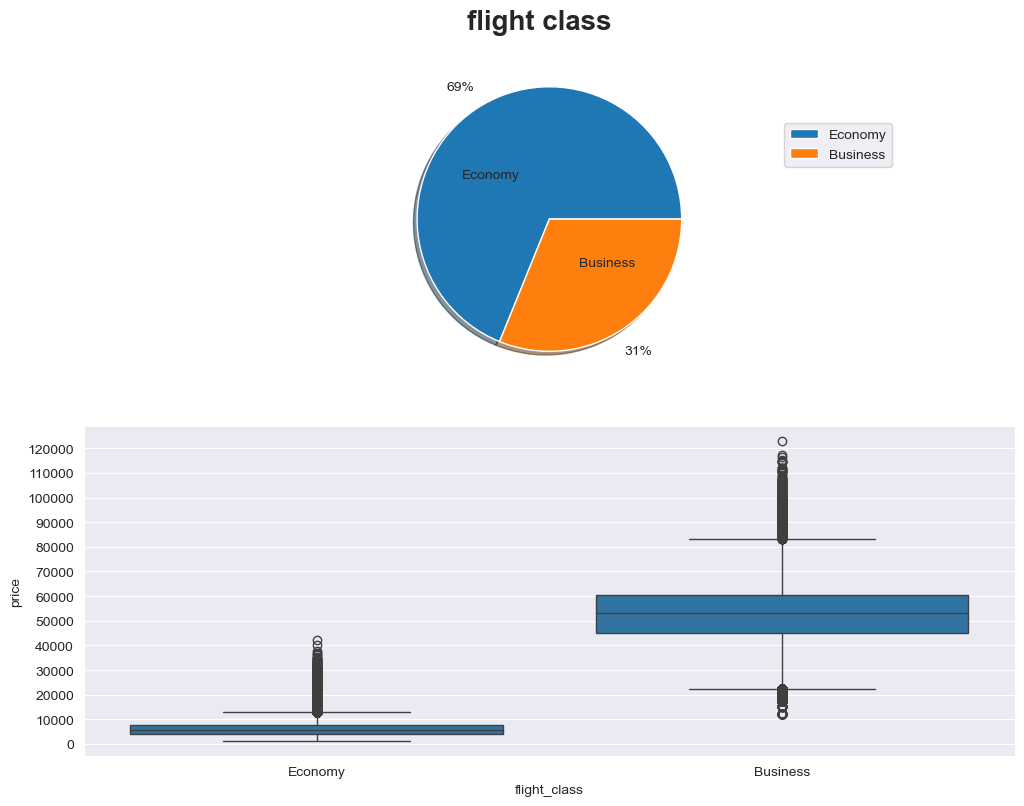

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('flight class', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = data.flight_class.value_counts().index.tolist()
# explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(data.flight_class.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='flight_class', y='price', data=data, ax=ax[1]).set_yticks(np.arange(0, 130000, 10000))
plt.show()

 - Abviously <code>Business</code> classes are more expesive than <code>Economie</code> .
 - Most of flights are <code>Economy</code> (about 69%).

### <code>duration</code>

In [26]:
len(data.duration.value_counts())

476

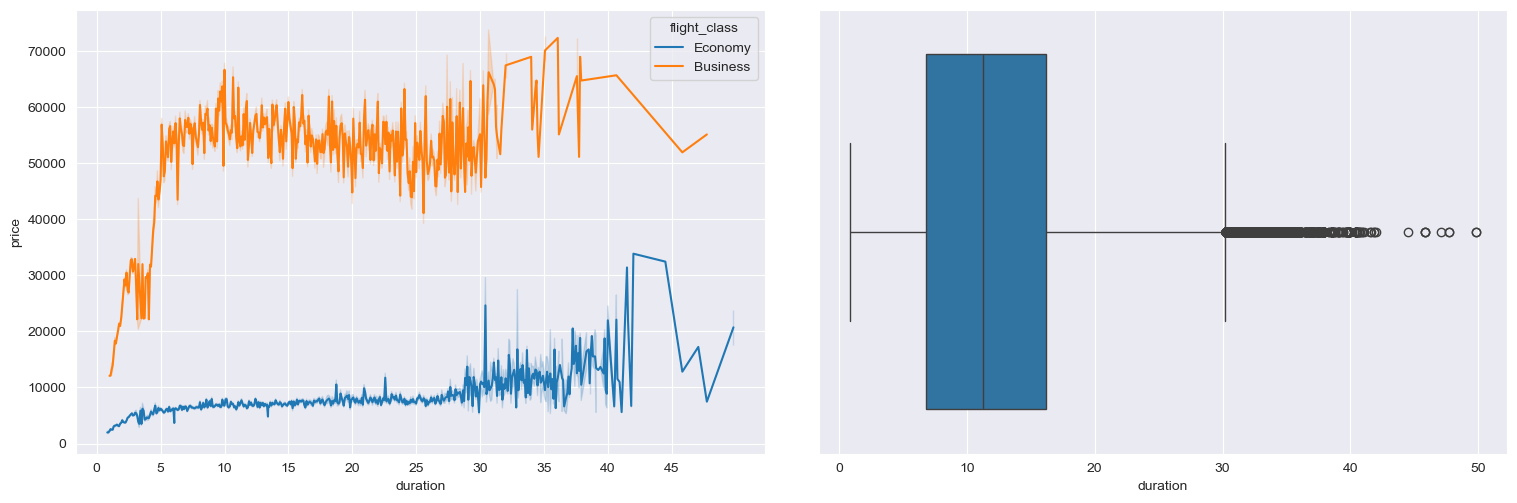

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
# Left ax
sns.lineplot(x='duration', y='price', data=data, ax=ax[0], hue='flight_class').set_xticks(np.arange(0, 50, 5))
# Right AX
sns.boxplot(data=data, x='duration', ax=ax[1])
plt.show()

 - In <code>Business class</code>, from 1 to 5 hours, price growth sharply.
 - In <code>Business class</code> for durations more than 5, Price in a channel between 45000 to 60000.
 - In <code>Economy class</code> growth of price have a linear growth and for duration=47 have a sharp raise in pricess.

### <code>days_left</code>

In [28]:
len(data.days_left.value_counts())

49

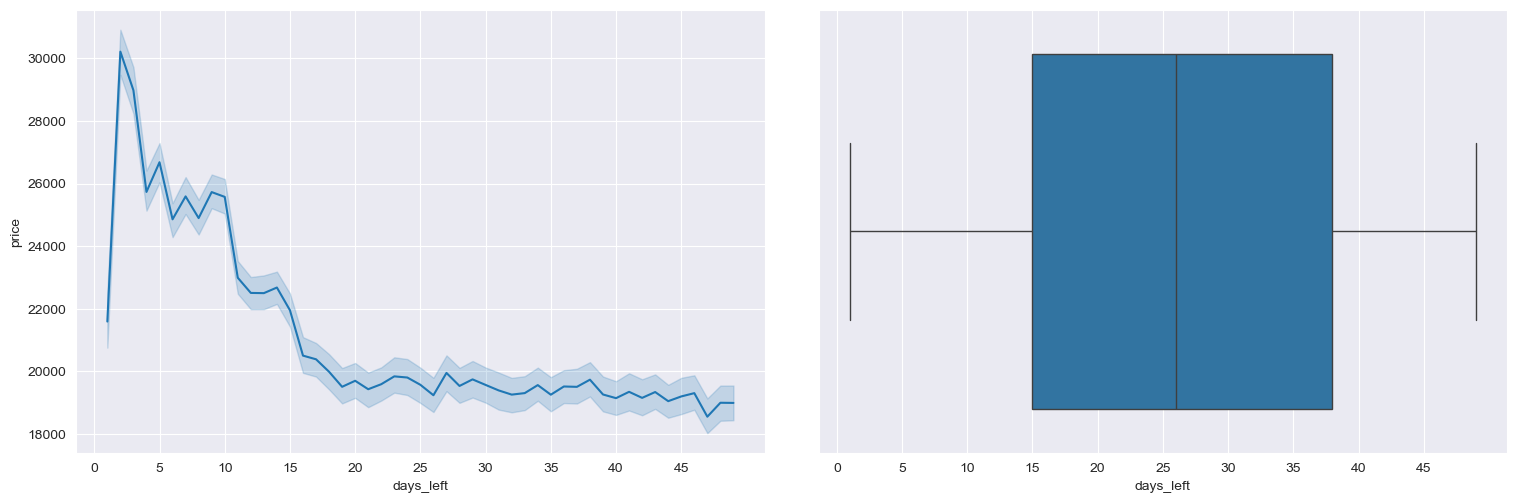

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
# Left ax
sns.lineplot(x='days_left', y='price', data=data, ax=ax[0]).set_xticks(np.arange(0, 50, 5))
# Right AX
sns.boxplot(data=data, x='days_left', ax=ax[1]).set_xticks(np.arange(0, 50, 5))
plt.show()

 - The earlier you book your ticket, the less you will pay(for values greater than 2)

### <code>price</code>

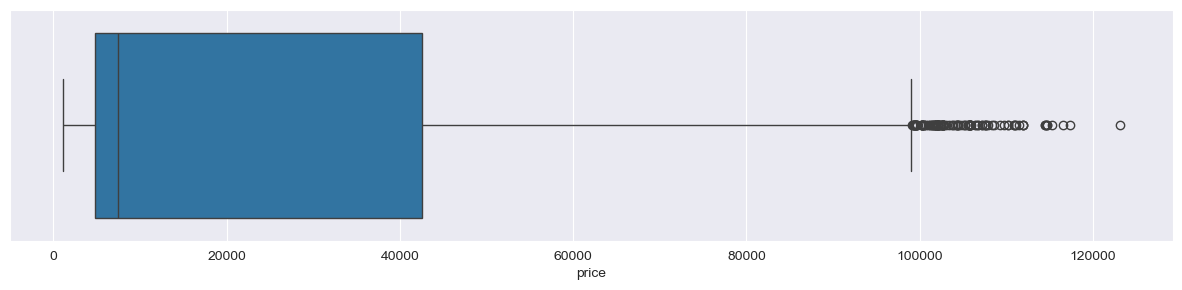

In [30]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=data, x='price')
plt.show()

<a id="prep"></a>
# <b><p style="background-image: url(https://i.postimg.cc/MpTLFhtf/wp9806504-network-desktop-wallpapers.jpg);background-size: cover;font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 4 | Preprocessing</p></b>



<a id="value"></a>
## <b><span style="color:navy">✈️ Step 4.1 | </span><span style="color:red">Value</span></b>

##  Replace string values with integer

In [31]:
# col : airline
data.airline = data.airline.replace(
    {
        'Vistara' : 1,
        'Air_India' : 2,
        'Indigo' : 3,
        'GO_FIRST' : 4,
        'AirAsia': 5,
        'SpiceJet' : 6  
    }
)

In [32]:
# col : source_city
data.source_city = data.source_city.replace(
    {
        'Delhi' : 1,
        'Mumbai' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad'  : 5,
        'Chennai' : 6
    }
)

In [33]:
# col : departure_time
data.departure_time = data.departure_time.replace(
    {
        'Morning' : 1,
        'Early_Morning' : 2, 
        'Evening' : 3,
        'Night' : 4,
        'Afternoon' : 5, 
        'Late_Night' : 6
    }
)

In [34]:
# col : stops
data.stops = data.stops.replace(
    {
        'one' : 1,
        'zero' : 2,
        'two_or_more' : 3
    }
)

In [35]:
# col : arrival_time
data.arrival_time = data.arrival_time.replace(
    {
        'Night' : 1,
        'Evening' : 2,
        'Morning' : 3,
        'Afternoon' : 4,
        'Early_Morning' : 5,
        'Late_Night' : 6
    }
)

In [36]:
# col : destination_city
data.destination_city = data.destination_city.replace(
    {
        'Mumbai' : 1,
        'Delhi' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad' : 5,
        'Chennai' : 6
    }
)

In [37]:
# col : flight_class
data.flight_class = data.flight_class.replace(
    {
        'Economy' : 1,
        'Business' :2
    }
)

In [38]:
data.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,2.153072,3.201487,2.794901,1.208480,2.498846,3.268316,1.311464,12.221021,26.004751,20889.660523
std,1.348357,1.684757,1.401659,0.503533,1.407841,1.688644,0.463093,7.191997,13.561004,22697.767366
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,1.000000,1105.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,6.830000,15.000000,4783.000000
50%,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,3.000000,5.000000,4.000000,1.000000,3.000000,5.000000,2.000000,16.170000,38.000000,42521.000000
max,6.000000,6.000000,6.000000,3.000000,6.000000,6.000000,2.000000,49.830000,49.000000,123071.000000


<a id="corr"></a>
## <b><span style="color:navy">✈️ Step 4.2 | </span><span style="color:red">Correlations</span></b>

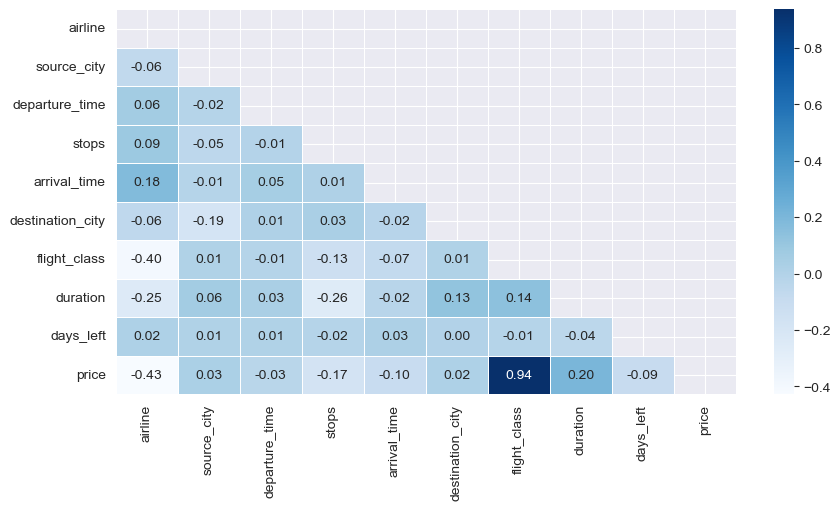

In [39]:
corr = data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

- <code>Flight classes</code> is most relevant feature to <code>Price</code>.

<a id="xy"></a>
## <b><span style="color:navy">✈️ Step 4.3 | </span><span style="color:red">Define X ,y</span></b>

In [40]:
# 1. Define the exact list of features you want to use
feature_columns = [
    'airline', 
    'source_city', 
    'destination_city',
    'departure_time', 
    'stops', 
    'flight_class', 
    'days_left'
]

# 2. Create X and y using only those columns
X_temp = data[feature_columns]
y = data['price']

print(f"Model will be trained on these {len(X_temp.columns)} features:")
print(X_temp.columns)


Model will be trained on these 7 features:
Index(['airline', 'source_city', 'destination_city', 'departure_time', 'stops',
       'flight_class', 'days_left'],
      dtype='object')


<a id="norm"></a>
## <b><span style="color:navy">✈️ Step 4.4 | </span><span style="color:red">Normalization</span></b>

In [41]:
# In Cell 41 of your notebook
import joblib  # Make sure this is imported

scaler = MinMaxScaler().fit(X_temp)  # Use .fit(), not .fit_transform()
X = pd.DataFrame(scaler.transform(X_temp), columns=X_temp.columns)

# --- ADD THIS LINE ---
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved successfully as scaler.pkl")

Scaler saved successfully as scaler.pkl


In [42]:
X.describe().T[['min', 'mean', 'std', '50%', 'max']].style.background_gradient(axis=1)

,min,mean,std,50%,max
airline,0.000000,0.230614,0.269671,0.200000,1.000000
source_city,0.000000,0.440297,0.336951,0.400000,1.000000
destination_city,0.000000,0.453663,0.337729,0.400000,1.000000
departure_time,0.000000,0.358980,0.280332,0.400000,1.000000
stops,0.000000,0.104240,0.251766,0.000000,1.000000
flight_class,0.000000,0.311464,0.463093,0.000000,1.000000
days_left,0.000000,0.520932,0.282521,0.520833,1.000000


In [43]:
main_X = X.copy()

<a id="ml"></a>
# <b><p style="background-image: url(https://i.postimg.cc/MpTLFhtf/wp9806504-network-desktop-wallpapers.jpg);background-size: cover;font-family:tahoma;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 5 | Modeling</p></b>



<a id="lr"></a>
## <b><span style="color:navy">✈️ Step 5.1 | </span><span style="color:red">LinearRegression</span></b>

Best test_size : 0.15
Best R2Score : 0.8937372423213428
Best Mean Squared Error : 54302756.360294476


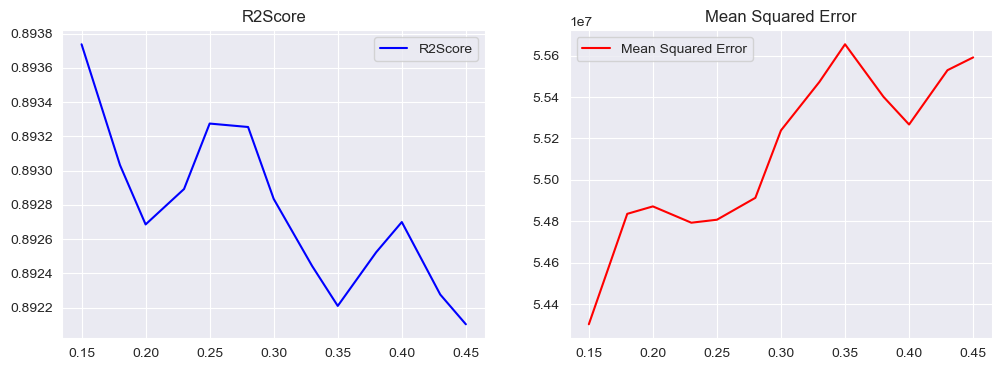

In [44]:
# Create a loop to find best test_size
test_list = []
mse_list = []
r2score_list = []
best_r2=0
best_mse=0
best_test=0

for tester in range(6, 19) :
    tester = round(0.025 * tester, 2)
    test_list.append(tester)
    #
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tester, random_state=0)
    #
    lr = LinearRegression().fit(X, y)
    y_pred_lr = lr.predict(X_test)
    r2score = metrics.r2_score(y_test, y_pred_lr)
    r2score_list.append(r2score)
    mse = metrics.mean_squared_error(y_test, y_pred_lr)
    mse_list.append(mse)
    #
    if r2score>best_r2 :
        best_r2 = r2score
        best_mse = mse
        best_test = tester
print(colored('Best test_size : {}'.format(best_test), 'blue'))
print(colored('Best R2Score : {}'.format(best_r2), 'blue'))
print(colored('Best Mean Squared Error : {}'.format(best_mse), 'blue'))

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(test_list, r2score_list, c='blue', label='R2Score')
ax[0].set_title("R2Score")
ax[0].legend()

ax[1].plot(test_list, mse_list, c='red', label='Mean Squared Error')
ax[1].set_title("Mean Squared Error")
ax[1].legend()
plt.show()

<div style="font-size:110%; font-weight:500; background-color:black">➡️ acc = 89.66%</div>
<div style="font-size:110%; font-weight:500; background-color:black">➡️ Use most relevant feature to target : <code>flight_class</code>  to increase accuracy</div>

In [45]:
for power in range(2, 7) :
    new_col_name = 'flight_class^' + str(power)
    X[new_col_name] = pow(X.flight_class, power)
    #
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test, random_state=0)
    #
    lr = LinearRegression().fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    r2score = metrics.r2_score(y_test, y_pred)
    diff = r2score-best_r2
    if r2score > best_r2 :
        best_r2 = r2score
        print(colored('{} improve r2score by {}'.format(new_col_name, diff), 'green'))
    else :
        X.drop(columns=[new_col_name], inplace=True)
        print(colored('{} Not improve r2score'.format(new_col_name), 'red'))


flight_class^2 Not improve r2score
flight_class^3 Not improve r2score
flight_class^4 Not improve r2score
flight_class^5 Not improve r2score
flight_class^6 Not improve r2score


In [47]:
lr_r2 = best_r2
print(colored('Liear Regresion R2Score = {}'.format(round(lr_r2, 3)), 'green'))

Liear Regresion R2Score = 0.913


<a id="tree"></a>
## <b><span style="color:navy">✈️ Step 5.2 | </span><span style="color:red">DecisionTreeRegressor</span></b>

In [48]:
parameters = {
    'splitter' : ['best', 'random'],
    'max_features' : [None, 8, 7, 6, 5],
}

X_train, X_test, y_train, y_test = train_test_split(main_X, y, test_size=tester, random_state=0)


tree = DecisionTreeRegressor()
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=20).fit(X_train, y_train)

print(colored('Tuned Hyper Parameters :\n{}'.format(tree_cv.best_params_), 'blue'))

Tuned Hyper Parameters :
{'max_features': 7, 'splitter': 'best'}


In [49]:
tree = DecisionTreeRegressor(**tree_cv.best_params_).fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
tree_r2 = metrics.r2_score(y_test, y_pred_tree)
print(colored('DecisionTreeRegressor R2Score = {}'.format(round(tree_r2, 3)), 'green'))

DecisionTreeRegressor R2Score = 0.955


<a id="rf"></a>
## <b><span style="color:navy">✈️ Step 5.3 | </span><span style="color:red">RandomForestRegressor</span></b>

In [50]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [51]:
X_train, X_test, y_train, y_test = train_test_split(main_X, y, test_size=tester, random_state=0)

rf = RandomForestRegressor(n_estimators=500, max_features=8, n_jobs=-1).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_r2 = metrics.r2_score(y_test, y_pred_rf)
print(colored('RandomForestRegressor R2Score = {}'.format(round(rf_r2, 3)), 'green'))
import joblib

# Save the trained model to a file
joblib.dump(rf, 'flight_model.pkl')

print("Model saved successfully as flight_model.pkl")

RandomForestRegressor R2Score = 0.958
Model saved successfully as flight_model.pkl


<a id="result"></a>
## <b><span style="color:navy">✈️ Step 4.4 | </span><span style="color:red">Result</span></b>

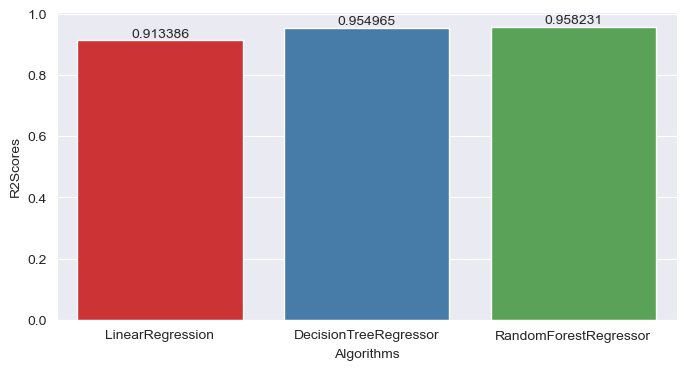

In [52]:
result = pd.DataFrame({
    'Algorithms' : ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor'],
    'R2Scores' : [lr_r2, tree_r2, rf_r2]
})
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Algorithms', y='R2Scores', data=result, palette='Set1')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### <div style="font-size:110%; font-weight:500; background-color:black">➡️ <code>RandomForestRegressor</code> have maximum R2Score and choose as best model.</div>

In [53]:
print(main_X.columns)

Index(['airline', 'source_city', 'destination_city', 'departure_time', 'stops',
       'flight_class', 'days_left'],
      dtype='object')
